In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [19]:
os.getcwd()
order_hist = pd.read_csv("PMA last 12 months - Copy.csv", low_memory = False)

In [20]:
# binary encode independent categorigal variable p_oarea
p_oarea_dm = pd.get_dummies(order_hist.iloc[:, 0])

# binary encode idependent categorical variable p_darea 
p_darea_dm = pd.get_dummies(order_hist.iloc[:, 1])

# indep. variable Lenth of Haul (in miles)
miles = order_hist.iloc[:, 2]

# Combine indep. variables
X = pd.concat([p_oarea_dm, p_darea_dm, miles], axis = 1)

## Dependent target variable 'All-In Revenue'
Y = order_hist.iloc[:, 3]

In [21]:
## Split data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [22]:
## Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# fit training data
regressor.fit(X_train, Y_train)

# predict test set
Y_pred = np.array(regressor.predict(X_test)).reshape((len(X_test), 1))

combined_results = pd.DataFrame(Y_pred)

# store Linear Regression r-squared
from sklearn.metrics import r2_score
r_sq = [r2_score(Y_test, Y_pred)]

# store regression coefficients
reg_coefficients = [regressor.coef_]

In [23]:
### Decision Tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

# fit training data
regressor.fit(X_train, Y_train)

# predict test set
Y_pred = regressor.predict(X_test)

# store Decision Tree results
combined_results['Decision Tree'] = Y_pred

# store Decision Tree r-squared
r_sq.append(r2_score(Y_test, Y_pred))
print(r_sq)

[0.95981713994863, 0.9868236022016382]


In [24]:
### Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

# fit training data
regressor.fit(X_train, Y_train.ravel())

# predict test set
Y_pred = regressor.predict(X_test)

# store Random Forest results
combined_results['RandomForest'] = Y_pred

# store Random Forest r-squared 
r_sq.append(r2_score(Y_test, Y_pred))

In [25]:
### K Nearest Neighbors 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

X_train = sc_X.fit_transform(np.array(X_train).reshape((len(X_train), -1)))
Y_train = sc_Y.fit_transform(np.array(Y_train).reshape((len(Y_train), -1)))

from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 50)
regressor.fit(X_train, Y_train)

# predict test set
Y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_test)))

# store KNN results
combined_results['KNN'] = Y_pred

# store KNN r-squared
r_sq.append(r2_score(Y_test, Y_pred))

combined_results.columns = ["Linear Regression", "Decision Tree", "Random Forest", "KNN"]
print(r_sq)

[0.95981713994863, 0.9868236022016382, 0.9872223439643596, 0.9713595032963961]


In [26]:
combined_results

,Linear Regression,Decision Tree,Random Forest,KNN
0,409.316081,346.410923,346.458627,346.4430
1,350.716960,399.802353,399.297274,387.0762
2,309.419303,273.464079,273.175633,278.7662
3,599.904877,900.715833,900.835641,901.5602
4,864.707243,875.400000,875.400000,871.8340
...,...,...,...,...
19438,268.676075,241.336892,241.468539,253.6838
19439,1020.330014,1076.155126,1074.326052,1076.4798
19440,294.411504,269.312156,269.279945,269.0980
19441,1408.062806,1490.936571,1490.490867,1490.7936


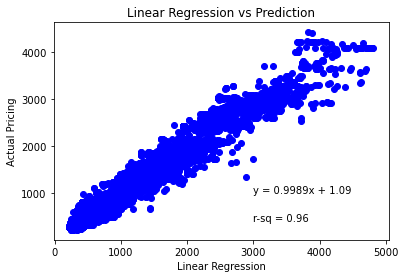

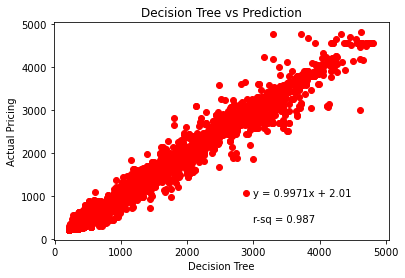

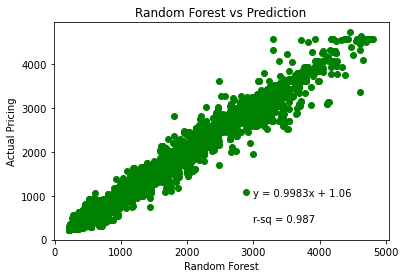

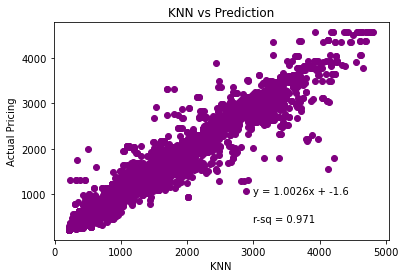

In [28]:
plt_titles = {0:"Linear Regression", 1:"Decision Tree", 2:"Random Forest", 3:"KNN"}
plt_colors = {0:"blue", 1:"red", 2:"green", 3:"purple"}

y = Y_test

for i in plt_titles:
    x = combined_results[plt_titles[i]]
  
    plt.xlabel(plt_titles[i])
    plt.ylabel('Actual Pricing')
    plt.title(plt_titles[i] + " vs Prediction")
    plt.text(3000,400, "r-sq = " + str(round(r_sq[i], 3)))
    plt.scatter(y, x, color = plt_colors[i])
    
    reg_coef = np.polyfit(x, y, 1)
    x_coef = str(round(reg_coef[0], 4))
    y_int = str(round(reg_coef[1], 2))
    lab = "y = " + str(x_coef) + "x + " + str(y_int)
    plt.text(3000, 1000, lab)
    plt.show()

    